# Weather Forecasting and Prediction using ANN 

## Data Fetching

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib.request

from geopy.geocoders import Nominatim

pd.set_option('display.max_columns', None)

In [2]:
start_date = input("Enter start date in yyyy/mm/dd format:")

Enter start date in yyyy/mm/dd format:2012/01/01


In [3]:
start_date = start_date.replace('/','')

In [4]:
end_date = input("Enter end date in yyyy/mm/dd format:")

Enter end date in yyyy/mm/dd format:2022/01/01


In [5]:
end_date = end_date.replace('/','')

In [6]:
address = input("Enter City Name:")

Enter City Name:Bengaluru


In [7]:
geolocator = Nominatim(user_agent="Apurva")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))
latitude = location.latitude
longitude = location.longitude

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
(12.9767936, 77.590082)


In [8]:
url = 'https://power.larc.nasa.gov//api/temporal/daily/point?parameters=T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE&community=SB&longitude={}6&latitude={}&start={}&end={}&format=CSV'.format(longitude,latitude,start_date,end_date)

In [9]:
urllib.request.urlretrieve(url,'weather.csv')

('weather.csv', <http.client.HTTPMessage at 0x23df5880760>)

In [10]:
df = pd.read_csv('weather.csv',skiprows=14)

In [11]:
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
0,2012,1,1,29.80,16.62,74.38,0.0,91.84,3.77
1,2012,1,2,30.84,17.33,71.19,0.0,91.84,2.60
2,2012,1,3,31.83,16.92,69.94,0.0,91.84,3.12
3,2012,1,4,32.12,18.23,68.12,0.0,91.87,2.81
4,2012,1,5,31.76,17.87,66.50,0.0,92.01,3.02


## Data Preprocessing

In [12]:
df['YEAR'] = df.YEAR.astype(str)
df['MO'] = df.MO.astype(str)
df['DY'] = df.DY.astype(str)

df['date'] = df['YEAR'].str.cat(df['MO'], sep = '/')
df['DATE'] = df['date'].str.cat(df['DY'], sep = '/')
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,date,DATE
0,2012,1,1,29.80,16.62,74.38,0.0,91.84,3.77,2012/1,2012/1/1
1,2012,1,2,30.84,17.33,71.19,0.0,91.84,2.60,2012/1,2012/1/2
2,2012,1,3,31.83,16.92,69.94,0.0,91.84,3.12,2012/1,2012/1/3
3,2012,1,4,32.12,18.23,68.12,0.0,91.87,2.81,2012/1,2012/1/4
4,2012,1,5,31.76,17.87,66.50,0.0,92.01,3.02,2012/1,2012/1/5


In [13]:
# removing unrequired attributes
df.drop(columns=['YEAR','MO','DY','date'],axis=1,inplace=True)
df.head()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,DATE
0,29.80,16.62,74.38,0.0,91.84,3.77,2012/1/1
1,30.84,17.33,71.19,0.0,91.84,2.60,2012/1/2
2,31.83,16.92,69.94,0.0,91.84,3.12,2012/1/3
3,32.12,18.23,68.12,0.0,91.87,2.81,2012/1/4
4,31.76,17.87,66.50,0.0,92.01,3.02,2012/1/5


In [14]:
df.set_index(['DATE'], inplace = True)
df.head()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
DATE,,,,,,
2012/1/1,29.80,16.62,74.38,0.0,91.84,3.77
2012/1/2,30.84,17.33,71.19,0.0,91.84,2.60
2012/1/3,31.83,16.92,69.94,0.0,91.84,3.12
2012/1/4,32.12,18.23,68.12,0.0,91.87,2.81
2012/1/5,31.76,17.87,66.50,0.0,92.01,3.02


In [15]:
df.dtypes

T2M_MAX        float64
T2M_MIN        float64
RH2M           float64
PRECTOTCORR    float64
PS             float64
WS10M_RANGE    float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3654 entries, 2012/1/1 to 2022/1/1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T2M_MAX      3654 non-null   float64
 1   T2M_MIN      3654 non-null   float64
 2   RH2M         3654 non-null   float64
 3   PRECTOTCORR  3654 non-null   float64
 4   PS           3654 non-null   float64
 5   WS10M_RANGE  3654 non-null   float64
dtypes: float64(6)
memory usage: 199.8+ KB


In [17]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

            T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR     PS  WS10M_RANGE
DATE                                                                
2012/1/1      29.80    16.62  74.38         0.00  91.84         3.77
2012/1/2      30.84    17.33  71.19         0.00  91.84         2.60
2012/1/3      31.83    16.92  69.94         0.00  91.84         3.12
2012/1/4      32.12    18.23  68.12         0.00  91.87         2.81
2012/1/5      31.76    17.87  66.50         0.00  92.01         3.02
2012/1/6      31.61    15.71  59.00         0.00  92.10         2.38
2012/1/7      31.82    15.04  58.62         0.00  92.13         3.09
2012/1/8      31.96    12.05  51.25         0.00  92.10         2.93
2012/1/9      32.16    15.51  61.06         0.00  91.96         3.95
2012/1/10     31.01    16.80  63.56         0.00  91.89         2.65
2012/1/11     29.95    17.64  65.56         0.23  91.94         4.91
2012/1/12     29.69    17.32  66.31         0.07  91.95         4.41
2012/1/13     28.71    17.30  64.1

In [18]:
df.shape

(3654, 6)

In [19]:
df.isnull().any()

T2M_MAX        False
T2M_MIN        False
RH2M           False
PRECTOTCORR    False
PS             False
WS10M_RANGE    False
dtype: bool

In [20]:
df.tail()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
DATE,,,,,,
2021/12/28,24.83,13.67,82.94,0.00,92.08,2.09
2021/12/29,24.96,14.51,82.44,0.00,92.01,2.28
2021/12/30,25.33,13.91,83.38,1.49,92.09,2.88
2021/12/31,25.42,17.28,86.56,3.07,92.15,4.50
2022/1/1,25.76,17.77,85.62,1.16,92.19,3.45


In [21]:
df.describe()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
count,3654.000000,3654.000000,3654.000000,3654.00000,3654.000000,3654.000000
mean,30.614819,18.619860,66.922679,2.22136,91.681029,3.677822
std,3.559473,2.786235,15.791747,5.10694,0.228940,1.228840
min,20.350000,9.310000,18.560000,0.00000,90.820000,0.550000
25%,27.862500,17.040000,55.455000,0.00000,91.510000,2.790000
50%,30.195000,19.200000,70.560000,0.11000,91.670000,3.590000
75%,32.920000,20.370000,79.500000,1.97000,91.860000,4.420000
max,40.370000,26.850000,94.250000,75.59000,92.360000,11.110000


In [22]:
# Scaling the data - Normalize (0-1) or Standardize (gaussian data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print('Scaled df:\n', df_scaled, '\n', df_scaled.shape)

Scaled df:
 [[0.47202797 0.41676169 0.73748183 0.         0.66233766 0.30492424]
 [0.52397602 0.45724059 0.69533624 0.         0.66233766 0.19412879]
 [0.57342657 0.43386545 0.67882151 0.         0.66233766 0.24337121]
 ...
 [0.24875125 0.2622577  0.8563879  0.0197116  0.82467532 0.22064394]
 [0.25324675 0.45438997 0.89840137 0.04061384 0.86363636 0.37405303]
 [0.27022977 0.48232611 0.8859823  0.01534595 0.88961039 0.27462121]] 
 (3654, 6)


In [23]:
# Splitting the dataset

# Train - Test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_scaled, test_size = 0.2, shuffle = False)

# X - Y
x_train, y_train, x_test, y_test = [], [], [], []
for i in range (1, len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
for i in range (1, len(test)):
    x_test.append(test[i-1])
    y_test.append(test[i])

In [24]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,0.472028,0.416762,0.737482,0.000000,0.662338,0.304924
1,0.523976,0.457241,0.695336,0.000000,0.662338,0.194129
2,0.573427,0.433865,0.678822,0.000000,0.662338,0.243371
3,0.587912,0.508552,0.654776,0.000000,0.681818,0.214015
4,0.569930,0.488027,0.633373,0.000000,0.772727,0.233902
...,...,...,...,...,...,...
2917,0.526973,0.472634,0.667195,0.000000,0.636364,0.236742
2918,0.454545,0.424743,0.726648,0.000000,0.675325,0.274621
2919,0.449051,0.455530,0.705245,0.000000,0.707792,0.177083
2920,0.431069,0.430445,0.710133,0.000000,0.720779,0.204545


In [25]:
pd.DataFrame(y_train)

,0,1,2,3,4,5
0,0.523976,0.457241,0.695336,0.000000,0.662338,0.194129
1,0.573427,0.433865,0.678822,0.000000,0.662338,0.243371
2,0.587912,0.508552,0.654776,0.000000,0.681818,0.214015
3,0.569930,0.488027,0.633373,0.000000,0.772727,0.233902
4,0.562438,0.364880,0.534285,0.000000,0.831169,0.173295
...,...,...,...,...,...,...
2917,0.454545,0.424743,0.726648,0.000000,0.675325,0.274621
2918,0.449051,0.455530,0.705245,0.000000,0.707792,0.177083
2919,0.431069,0.430445,0.710133,0.000000,0.720779,0.204545
2920,0.440060,0.489168,0.730876,0.000397,0.746753,0.144886


In [26]:
# Converting list to array
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2922, 6), (2922, 6), (730, 6), (730, 6))

## Building the model

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [28]:
#define model
model = Sequential()
model.add(Dense(6, input_dim = 6, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6))

model.summary()

#compile  model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Fit the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 15, shuffle = False)

Epoch 1/200
195/195 [==============================] - 1s 3ms/step - loss: 0.1077 - accuracy: 0.2293 - val_loss: 0.0353 - val_accuracy: 0.5753
Epoch 2/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.5414 - val_loss: 0.0242 - val_accuracy: 0.6890
Epoch 3/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.6174 - val_loss: 0.0185 - val_accuracy: 0.7562
Epoch 4/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.6903 - val_loss: 0.0153 - val_accuracy: 0.7575
Epoch 5/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.7005 - val_loss: 0.0137 - val_accuracy: 0.7712
Epoch 6/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.7070 - val_loss: 0.0125 - val_accuracy: 0.7904
Epoch 7/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.7125 - val_loss: 0.0112 - val_accuracy: 0.8247

Epoch 58/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.8340 - val_loss: 0.0054 - val_accuracy: 0.8822
Epoch 59/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.8337 - val_loss: 0.0054 - val_accuracy: 0.8822
Epoch 60/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.8347 - val_loss: 0.0054 - val_accuracy: 0.8836
Epoch 61/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.8354 - val_loss: 0.0054 - val_accuracy: 0.8849
Epoch 62/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.8344 - val_loss: 0.0054 - val_accuracy: 0.8877
Epoch 63/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.8347 - val_loss: 0.0054 - val_accuracy: 0.8849
Epoch 64/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.8333 - val_loss: 0.0054 - val_accuracy:

Epoch 115/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.8313 - val_loss: 0.0054 - val_accuracy: 0.8808
Epoch 116/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.8306 - val_loss: 0.0054 - val_accuracy: 0.8808
Epoch 117/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.8309 - val_loss: 0.0054 - val_accuracy: 0.8808
Epoch 118/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.8309 - val_loss: 0.0054 - val_accuracy: 0.8808
Epoch 119/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.8323 - val_loss: 0.0054 - val_accuracy: 0.8808
Epoch 120/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.8323 - val_loss: 0.0054 - val_accuracy: 0.8808
Epoch 121/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.8316 - val_loss: 0.0054 - val_ac

195/195 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.8313 - val_loss: 0.0053 - val_accuracy: 0.8767
Epoch 172/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.8309 - val_loss: 0.0053 - val_accuracy: 0.8767
Epoch 173/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.8313 - val_loss: 0.0053 - val_accuracy: 0.8767
Epoch 174/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.8309 - val_loss: 0.0053 - val_accuracy: 0.8781
Epoch 175/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.8313 - val_loss: 0.0053 - val_accuracy: 0.8781
Epoch 176/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.8306 - val_loss: 0.0053 - val_accuracy: 0.8781
Epoch 177/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.8306 - val_loss: 0.0053 - val_accuracy: 0.8781

In [30]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
actual_y_pred = scaler.inverse_transform(y_test)

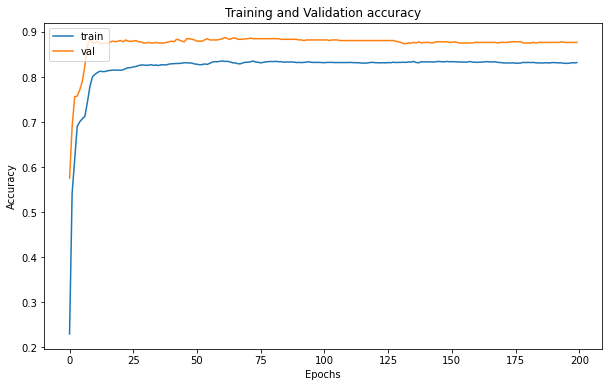

In [31]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

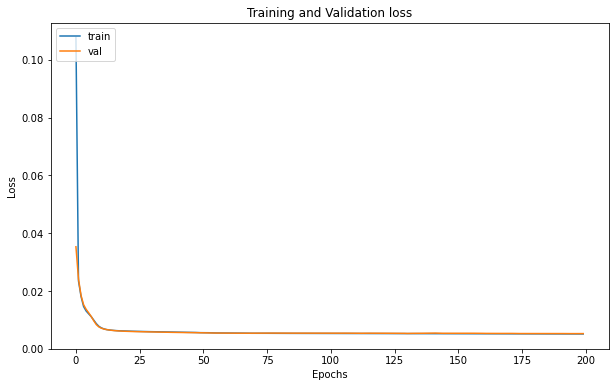

In [32]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
print('Actual values:')
print(' T2M_MAX  T2M_MIN RH2M  PRECTOTCORR PS  WS10M_RANGE')
print(pd.DataFrame(actual_y_pred))

print()
print('-----------------------------------------------------------------------------------')
print()
print('Predicted values:')
print('       T2M_MAX    T2M_MIN    RH2M    PRECTOTCORR   PS    WS10M_RANGE')
print(pd.DataFrame(y_pred))

Actual values:
 T2M_MAX  T2M_MIN RH2M  PRECTOTCORR PS  WS10M_RANGE
         0      1      2     3      4     5
0    30.83  18.42  72.00  0.00  92.01  1.88
1    30.59  19.20  72.06  0.00  91.85  2.80
2    30.87  19.69  74.19  0.00  91.83  3.27
3    30.03  19.44  72.31  0.13  92.00  3.22
4    29.89  17.27  70.75  0.04  92.02  3.55
..     ...    ...    ...   ...    ...   ...
725  24.83  13.67  82.94  0.00  92.08  2.09
726  24.96  14.51  82.44  0.00  92.01  2.28
727  25.33  13.91  83.38  1.49  92.09  2.88
728  25.42  17.28  86.56  3.07  92.15  4.50
729  25.76  17.77  85.62  1.16  92.19  3.45

[730 rows x 6 columns]

-----------------------------------------------------------------------------------

Predicted values:
       T2M_MAX    T2M_MIN    RH2M    PRECTOTCORR   PS    WS10M_RANGE
             0          1          2         3          4         5
0    29.860548  18.038877  72.203491  2.463233  92.080170  2.641451
1    30.094646  18.325588  71.832985  2.454651  92.029465  2.816571
2   

In [34]:
# Evaluating the model
scores = model.evaluate(actual_y_pred, y_pred, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.04%


In [35]:
T = range(y_pred.shape[0])

Text(0, 0.5, 'Temperature')

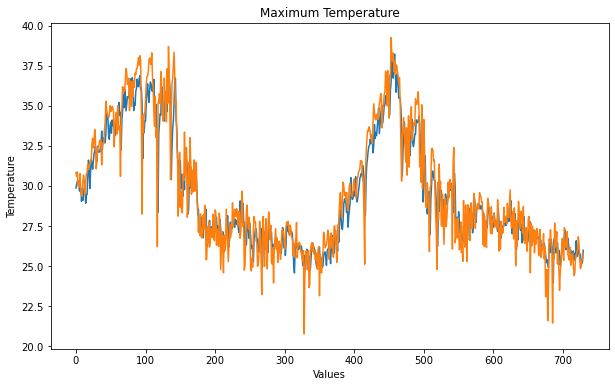

In [36]:
plt.plot(T, y_pred[:,0])
plt.plot(T, actual_y_pred[:,0])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Maximum Temperature')
plt.xlabel('Values')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

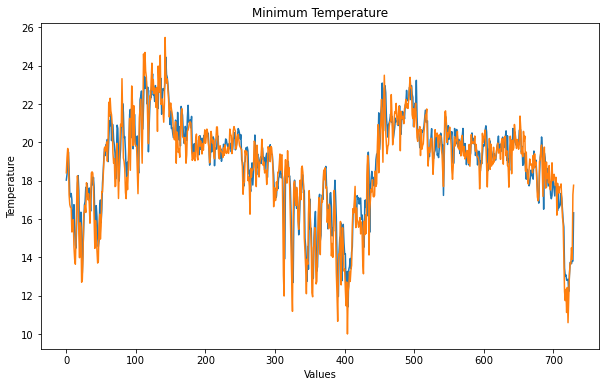

In [37]:
plt.plot(T, y_pred[:,1])
plt.plot(T, actual_y_pred[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Minimum Temperature')
plt.xlabel('Values')
plt.ylabel('Temperature')

Text(0, 0.5, 'Humidity')

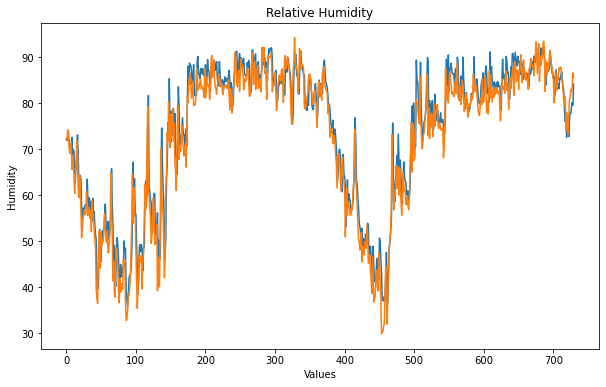

In [38]:
plt.plot(T, y_pred[:,2])
plt.plot(T, actual_y_pred[:,2])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Relative Humidity')
plt.xlabel('Values')
plt.ylabel('Humidity')

Text(0, 0.5, 'Precipitation')

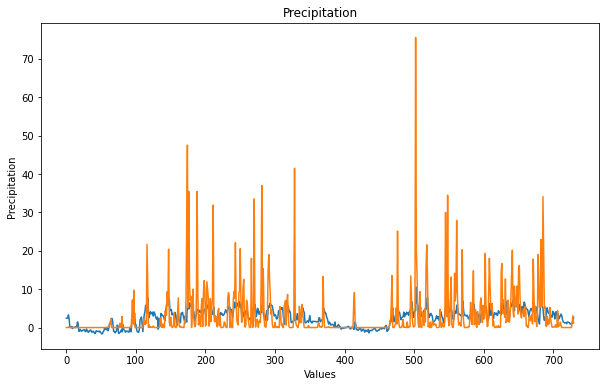

In [39]:
plt.plot(T, y_pred[:,3])
plt.plot(T, actual_y_pred[:,3])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Precipitation')
plt.xlabel('Values')
plt.ylabel('Precipitation')

Text(0, 0.5, 'Surface Pressure')

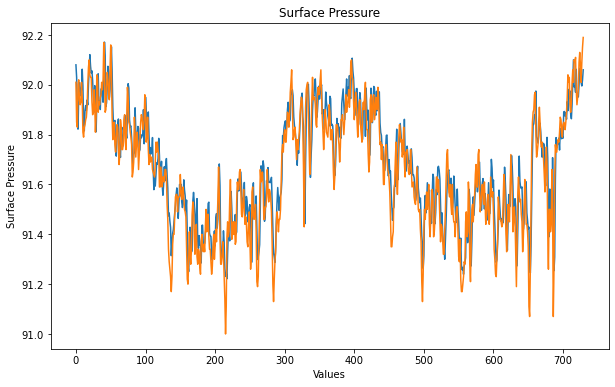

In [40]:
plt.plot(T, y_pred[:,4])
plt.plot(T, actual_y_pred[:,4])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Surface Pressure')
plt.xlabel('Values')
plt.ylabel('Surface Pressure')

Text(0, 0.5, 'Wind Speed')

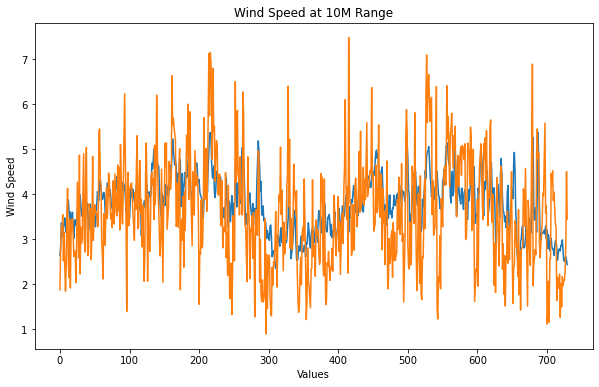

In [41]:
plt.plot(T, y_pred[:,5])
plt.plot(T, actual_y_pred[:,5])
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Wind Speed at 10M Range')
plt.xlabel('Values')
plt.ylabel('Wind Speed')

In [42]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(x_train, y_train):
    # Fit the model on training data
    model.fit(x_train[tr], y_train[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(x_train[tt])
    results.append((prediction, tt))

83/83 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.8373


## Prediction

In [44]:
input_data = []

print('Enter the weather parameters of previous day: ')

attr1 = float(input("Enter Maximum Temperature: "))
attr2 = float(input("Enter Minimum Temperature: "))
attr3 = float(input("Enter Relative Humidity:"))
attr4 = float(input("Enter Precipitation: "))
attr5 = float(input("Enter Surface Pressure: "))
attr6 = float(input("Enter Wind Speed at 10M Range: "))

input_data.append(attr1)
input_data.append(attr2)
input_data.append(attr3)
input_data.append(attr4)
input_data.append(attr5)
input_data.append(attr6)

input_data = np.array(input_data) 
input_data.shape = (1,6)

print()
print('---------------------------------------------------------------------------------------')
print('Input Data: ', input_data)
input_data = scaler.transform(input_data)
print('Scaled Input Data:', input_data)

print()
pred1 = model.predict(input_data)
pred2 = scaler.inverse_transform(pred1)
print('Predicted Data: ')
print(pd.DataFrame(pred2))

print()
print('--------------------------------------------------------------------------------------')
print()

print('Predicted Values:')
print('Maximum Temperature:', pred2[0][0])
print('Minimum Temperature:', pred2[0][1])
print('Relative Humidity:', pred2[0][2])
print('Precipitation:', pred2[0][3])
print('Surface Pressure:', pred2[0][4])
print('Wind Speed at 10m range:', pred2[0][5])

Enter the weather parameters of previous day: 
Enter Maximum Temperature: 32.7
Enter Minimum Temperature: 17.8
Enter Relative Humidity:72.3
Enter Precipitation: 1.8
Enter Surface Pressure: 92.1
Enter Wind Speed at 10M Range: 2.6

---------------------------------------------------------------------------------------
Input Data:  [[32.7 17.8 72.3  1.8 92.1  2.6]]
Scaled Input Data: [[0.61688312 0.48403649 0.71000132 0.02381267 0.83116883 0.19412879]]

Predicted Data: 
           0          1          2         3          4         5
0  30.550777  18.338076  68.896423  2.981541  92.085304  2.266698

--------------------------------------------------------------------------------------

Predicted Values:
Maximum Temperature: 30.550777
Minimum Temperature: 18.338076
Relative Humidity: 68.89642
Precipitation: 2.9815412
Surface Pressure: 92.085304
Wind Speed at 10m range: 2.2666976
